# Preparing data for curriculum learning

## Background

In [2]:
import tifffile
from skimage import io
from PIL import Image
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, img_as_float
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2

In [3]:
import os
current_directory = os.getcwd()
print("Bieżący katalog roboczy:", current_directory)
os.chdir('..')
new_directory = os.getcwd()
print("Nowy katalog roboczy (nadrzędny):", new_directory)

Bieżący katalog roboczy: c:\Users\User\Desktop\SEM_6\WB\Warsztaty-badawcze\CurriculumLearning
Nowy katalog roboczy (nadrzędny): c:\Users\User\Desktop\SEM_6\WB\Warsztaty-badawcze


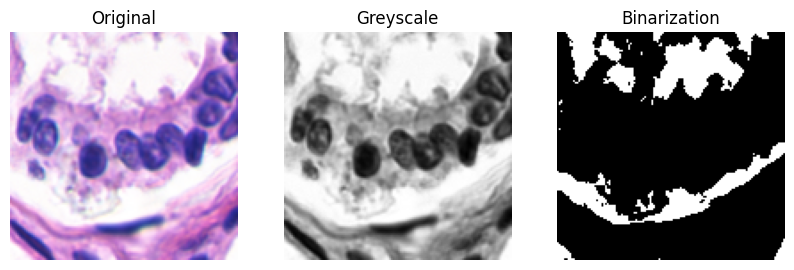

White percentage: 16.57%


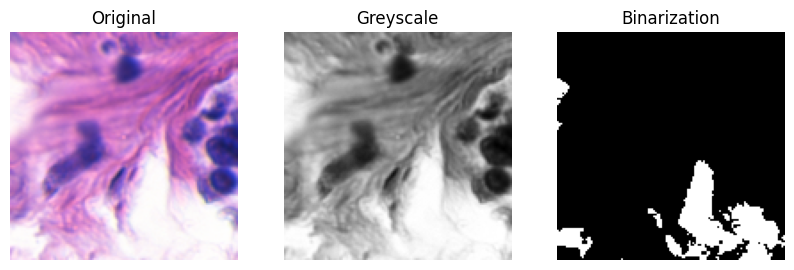

White percentage: 9.79%


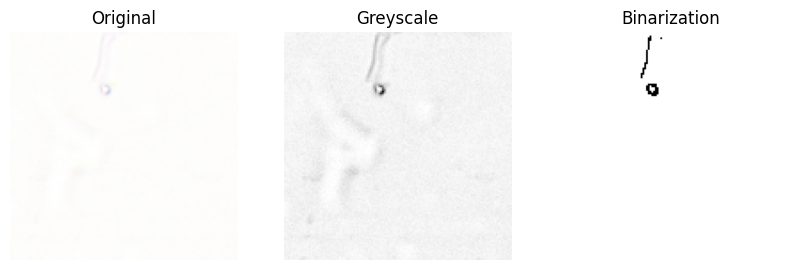

White percentage: 98.44%


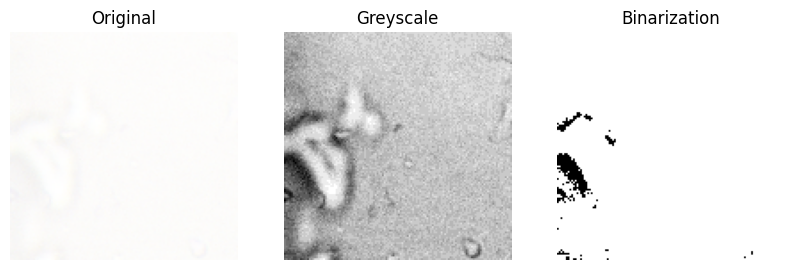

White percentage: 96.32%


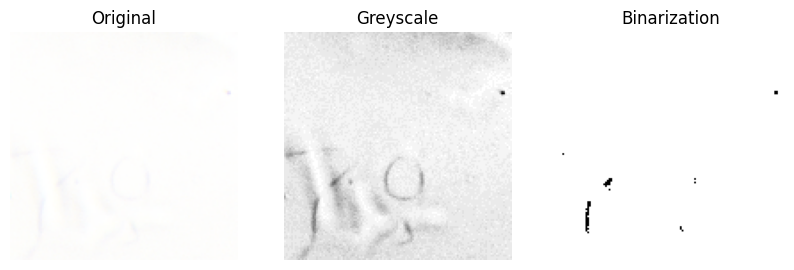

White percentage: 98.44%


In [53]:
def whitePercentage(obrazek):
    img = io.imread(obrazek)
    imgBW = cv2.imread(obrazek, cv2.IMREAD_GRAYSCALE)

    ret, thresh = cv2.threshold(imgBW, 245, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # percentage of white
    white_area = sum(cv2.contourArea(cnt) for cnt in contours)
    total_area = imgBW.shape[0] * imgBW.shape[1]
    percent_white = (white_area / total_area) * 100

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Greyscale")
    plt.imshow(imgBW, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Binarization")
    plt.imshow(thresh, cmap='gray')
    plt.axis('off')

    plt.show()

    return percent_white


# Przykładowe użycie
imagePath = "Data/Selected_5_Random/ytma23_022103_benign3_ccd/0_1.png"
imagePath2 = "Data/Selected_5_Random/ytma23_022103_benign3_ccd/1_5.png"
imagePath3 = "Data/Selected_5_Random/ytma23_022103_benign3_ccd/5_0.png"
imagePath4 = "Data/Selected_5_Random/ytma23_022103_benign3_ccd/5_3.png"
imagePath5 = "Data/Selected_5_Random/ytma23_022103_benign3_ccd/5_5.png"


percent_white = whitePercentage(imagePath)
print(f"White percentage: {percent_white:.2f}%")

percent_white = whitePercentage(imagePath2)
print(f"White percentage: {percent_white:.2f}%")

percent_white = whitePercentage(imagePath3)
print(f"White percentage: {percent_white:.2f}%")

percent_white = whitePercentage(imagePath4)
print(f"White percentage: {percent_white:.2f}%")

percent_white = whitePercentage(imagePath5)
print(f"White percentage: {percent_white:.2f}%")

In [6]:
def countWhitePercentage(obrazek):
    img = io.imread(obrazek)
    imgBW = cv2.imread(obrazek, cv2.IMREAD_GRAYSCALE)

    ret, thresh = cv2.threshold(imgBW, 245, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # percentage of white
    white_area = sum(cv2.contourArea(cnt) for cnt in contours)
    total_area = imgBW.shape[0] * imgBW.shape[1]
    percent_white = (white_area / total_area) * 100

    return percent_white

In [68]:
import os
import pandas as pd

def count_images_with_high_white_percentage(base_dir):
    data = []

    for root, dirs, files in os.walk(base_dir):
        if root == base_dir:
            continue
        count = sum(1 for file in files if countWhitePercentage(os.path.join(root, file)) > 70)
        
        relative_path = os.path.relpath(root, base_dir)
        
        data.append({'subfolder': relative_path, 'image_count': count})

    df = pd.DataFrame(data)
    
    return df

base_dir = 'Data/Selected_5_Random/Train'
df = count_images_with_high_white_percentage(base_dir)
print(df)

                       subfolder  image_count
0      ytma10_010704_benign1_ccd            0
1      ytma10_010704_benign2_ccd            0
2   ytma10_010704_malignant1_ccd            0
3   ytma10_010704_malignant3_ccd            0
4      ytma12_010804_benign1_ccd            1
5      ytma12_010804_benign2_ccd            0
6      ytma12_010804_benign3_ccd            1
7   ytma12_010804_malignant1_ccd            0
8   ytma12_010804_malignant2_ccd            0
9   ytma12_010804_malignant3_ccd            1
10     ytma23_022103_benign1_ccd            2
11     ytma23_022103_benign3_ccd            3
12  ytma23_022103_malignant2_ccd            0
13     ytma49_042003_benign1_ccd            1
14     ytma49_042003_benign3_ccd            0
15  ytma49_042003_malignant1_ccd            1
16  ytma49_042003_malignant2_ccd            1
17     ytma49_042203_benign1_ccd            0
18     ytma49_042203_benign2_ccd            0
19  ytma49_042203_malignant1_ccd            0
20  ytma49_042203_malignant2_ccd  

In [69]:
df.to_csv("Data/background2.csv", index=False)

In [70]:
count_per_image_count = df['image_count'].value_counts()
print(count_per_image_count)

image_count
0    24
1    11
2     4
3     1
Name: count, dtype: int64


Wybrane zestawy do curriculum learingu:
- 0: 1

In [55]:
import os
import shutil

def create_background_easy_folder(base_dir, output_dir, df):
    # Tworzenie folderu 'DataBackgroundEasy'
    os.makedirs(output_dir, exist_ok=True)

    # Iterowanie przez każdy subfolder w ramce danych
    for index, row in df.iterrows():
        subfolder = row['subfolder']
        image_count = row['image_count']
        
        # Sprawdzanie, czy image_count wynosi 0
        if image_count == 0:
            # Ścieżka do subfoldera
            subfolder_path = os.path.join(base_dir, subfolder)
            # Ścieżka do docelowego folderu w 'DataBackgroundEasy'
            target_folder_path = os.path.join(output_dir, subfolder)
            # Kopiowanie subfoldera wraz ze wszystkimi plikami
            shutil.copytree(subfolder_path, target_folder_path)


In [59]:
# Ścieżka do folderu z danymi
base_dir = 'Data/Selected_5_Random/Train'
output_dir = 'CurriculumLearning/DataBackgroundEasy'
# Tworzenie folderu 'DataBackgroundEasy' i kopiowanie odpowiednich subfolderów
create_background_easy_folder(base_dir, output_dir, df)

In [60]:
import os
import csv 

input_folder = "CurriculumLearning/DataBackgroundEasy"
output_csv = "CurriculumLearning/DataBackgroundEasy/labels.csv"

with open(output_csv, 'w', newline='') as csvfile:
    fieldnames = ['filename', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    
    for filename in os.listdir(input_folder):
        label = "benign" if "benign" in filename else "malignant"
        
        writer.writerow({'filename': filename, 'label': label})

In [71]:
import os
import shutil

def create_background_medium_folder(base_dir, output_dir, df):
    # Tworzenie folderu 'DataBackgroundEasy'
    os.makedirs(output_dir, exist_ok=True)

    # Iterowanie przez każdy subfolder w ramce danych
    for index, row in df.iterrows():
        subfolder = row['subfolder']
        image_count = row['image_count']
        
        # Sprawdzanie, czy image_count wynosi 0
        if image_count == 0 or image_count == 1:
            # Ścieżka do subfoldera
            subfolder_path = os.path.join(base_dir, subfolder)
            # Ścieżka do docelowego folderu w 'DataBackgroundEasy'
            target_folder_path = os.path.join(output_dir, subfolder)
            # Kopiowanie subfoldera wraz ze wszystkimi plikami
            shutil.copytree(subfolder_path, target_folder_path)


In [73]:
# Ścieżka do folderu z danymi
base_dir = 'Data/Selected_5_Random/Train'
output_dir = 'CurriculumLearning/DataBackgroundMedium'
# Tworzenie folderu 'DataBackgroundEasy' i kopiowanie odpowiednich subfolderów
create_background_medium_folder(base_dir, output_dir, df)

In [74]:
import os
import csv 

input_folder = "CurriculumLearning/DataBackgroundMedium"
output_csv = "CurriculumLearning/DataBackgroundMedium/labels.csv"

with open(output_csv, 'w', newline='') as csvfile:
    fieldnames = ['filename', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    
    for filename in os.listdir(input_folder):
        label = "benign" if "benign" in filename else "malignant"
        
        writer.writerow({'filename': filename, 'label': label})

## Maski

In [75]:
import os
import pandas as pd

def get_images_in_subfolders(base_dir):
    subfolders_images = {}

    # Iteracja przez wszystkie subfoldery w folderze bazowym
    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)
        
        # Sprawdzanie, czy jest to folder
        if os.path.isdir(subfolder_path):
            images = [file for file in os.listdir(subfolder_path) if file.endswith(('png', 'jpg', 'jpeg', 'tiff', 'tif'))]
            subfolders_images[subfolder] = images

    return subfolders_images


In [111]:
base_dir = 'Masks/PatchesIsMask/Mask'
subfolders_images = get_images_in_subfolders(base_dir)

# Wyświetlanie wyników
for subfolder, images in subfolders_images.items():
    print(f"Subfolder: {subfolder}")
    for image in images:
        print(f" - {image}")

# Opcjonalnie: zapisywanie wyników do pliku CSV
df = pd.DataFrame([(subfolder, image) for subfolder, images in subfolders_images.items() for image in images], columns=['Subfolder', 'Image'])
df.to_csv('CurriculumLearning/subfolders_images.csv', index=False)

Subfolder: ytma10_010704_benign1
 - 1_1.png
 - 1_2.png
 - 2_1.png
 - 2_2.png
Subfolder: ytma10_010704_benign2
 - 3_3.png
 - 3_4.png
 - 3_5.png
 - 4_3.png
 - 4_4.png
 - 4_5.png
 - 5_3.png
 - 5_4.png
Subfolder: ytma10_010704_benign3
 - 2_1.png
 - 2_2.png
 - 2_3.png
 - 3_1.png
 - 3_2.png
 - 3_3.png
 - 4_2.png
 - 4_3.png
Subfolder: ytma10_010704_malignant1
 - 0_1.png
 - 0_2.png
 - 1_0.png
 - 1_1.png
 - 1_2.png
 - 2_0.png
 - 2_1.png
 - 2_2.png
Subfolder: ytma10_010704_malignant2
 - 1_1.png
 - 1_2.png
 - 1_3.png
 - 2_1.png
 - 2_2.png
 - 2_3.png
 - 3_1.png
 - 3_2.png
 - 3_3.png
Subfolder: ytma10_010704_malignant3
 - 3_3.png
 - 3_4.png
 - 3_5.png
 - 4_3.png
 - 4_4.png
 - 4_5.png
 - 5_3.png
 - 5_4.png
 - 5_5.png
Subfolder: ytma12_010804_benign1
 - 4_5.png
 - 4_6.png
 - 5_5.png
 - 5_6.png
Subfolder: ytma12_010804_benign2
 - 3_3.png
 - 3_4.png
 - 3_5.png
 - 4_3.png
 - 4_4.png
Subfolder: ytma12_010804_benign3
 - 0_4.png
 - 0_5.png
 - 1_4.png
 - 1_5.png
Subfolder: ytma12_010804_malignant1
 - 1_3.pn

In [112]:
df

,Subfolder,Image
0,ytma10_010704_benign1,1_1.png
1,ytma10_010704_benign1,1_2.png
2,ytma10_010704_benign1,2_1.png
3,ytma10_010704_benign1,2_2.png
4,ytma10_010704_benign2,3_3.png
...,...,...
380,ytma55_030603_benign6,3_2.png
381,ytma55_030603_benign6,3_3.png
382,ytma55_030603_benign6,4_2.png
383,ytma55_030603_benign6,4_3.png


In [113]:
df['Subfolder'] = df['Subfolder'] + '_cdd'
df

,Subfolder,Image
0,ytma10_010704_benign1_cdd,1_1.png
1,ytma10_010704_benign1_cdd,1_2.png
2,ytma10_010704_benign1_cdd,2_1.png
3,ytma10_010704_benign1_cdd,2_2.png
4,ytma10_010704_benign2_cdd,3_3.png
...,...,...
380,ytma55_030603_benign6_cdd,3_2.png
381,ytma55_030603_benign6_cdd,3_3.png
382,ytma55_030603_benign6_cdd,4_2.png
383,ytma55_030603_benign6_cdd,4_3.png


In [142]:
import pandas as pd
df_masks = pd.read_csv('CurriculumLearning/masks.csv')
df_masks

,subfolder,masks
0,ytma10_010704_benign1_ccd,1
1,ytma10_010704_benign2_ccd,1
2,ytma10_010704_malignant1_ccd,1
3,ytma10_010704_malignant3_ccd,1
4,ytma12_010804_benign1_ccd,0
5,ytma12_010804_benign2_ccd,0
6,ytma12_010804_benign3_ccd,1
7,ytma12_010804_malignant1_ccd,2
8,ytma12_010804_malignant2_ccd,1
9,ytma12_010804_malignant3_ccd,0


In [143]:
mask_patch_per_image_count = df_masks['masks'].value_counts()
print(mask_patch_per_image_count)

masks
0    16
1    14
2     8
3     2
Name: count, dtype: int64


In [148]:
import os
import shutil

def create_mask_easy_folder(base_dir, output_dir, df):
    # Tworzenie folderu 'DataBackgroundEasy'
    os.makedirs(output_dir, exist_ok=True)

    # Iterowanie przez każdy subfolder w ramce danych
    for index, row in df.iterrows():
        subfolder = row['subfolder']
        masks = row['masks']
        
        # Sprawdzanie, czy image_count wynosi 0
        if masks == 3 or masks == 2 or masks == 1:
            # Ścieżka do subfoldera
            subfolder_path = os.path.join(base_dir, subfolder)
            # Ścieżka do docelowego folderu w 'DataBackgroundEasy'
            target_folder_path = os.path.join(output_dir, subfolder)
            # Kopiowanie subfoldera wraz ze wszystkimi plikami
            shutil.copytree(subfolder_path, target_folder_path)

In [149]:
# Ścieżka do folderu z danymi
base_dir = 'Data/Selected_5_Random/Train'
output_dir = 'CurriculumLearning/DataMasksEasy'
# Tworzenie folderu 'DataBackgroundEasy' i kopiowanie odpowiednich subfolderów
create_mask_easy_folder(base_dir, output_dir, df_masks)

In [155]:
import os
import csv 

input_folder = "CurriculumLearning/DataMasksEasy"
output_csv = "CurriculumLearning/DataMasksEasy/labels.csv"

with open(output_csv, 'w', newline='') as csvfile:
    fieldnames = ['filename', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    
    for filename in os.listdir(input_folder):
        label = "benign" if "benign" in filename else "malignant"
        
        writer.writerow({'filename': filename, 'label': label})

In [150]:
import os
import shutil

def create_mask_easy_folder_2(base_dir, output_dir, df):
    # Tworzenie folderu 'DataBackgroundEasy'
    os.makedirs(output_dir, exist_ok=True)

    # Iterowanie przez każdy subfolder w ramce danych
    for index, row in df.iterrows():
        subfolder = row['subfolder']
        masks = row['masks']
        
        # Sprawdzanie, czy image_count wynosi 0
        if masks == 3 or masks == 2:
            # Ścieżka do subfoldera
            subfolder_path = os.path.join(base_dir, subfolder)
            # Ścieżka do docelowego folderu w 'DataBackgroundEasy'
            target_folder_path = os.path.join(output_dir, subfolder)
            # Kopiowanie subfoldera wraz ze wszystkimi plikami
            shutil.copytree(subfolder_path, target_folder_path)

In [152]:
# Ścieżka do folderu z danymi
base_dir = 'Data/Selected_5_Random/Train'
output_dir = 'CurriculumLearning/DataMasksEasy2'
# Tworzenie folderu 'DataBackgroundEasy' i kopiowanie odpowiednich subfolderów
create_mask_easy_folder_2(base_dir, output_dir, df_masks)

In [156]:
import os
import csv 

input_folder = "CurriculumLearning/DataMasksEasy2"
output_csv = "CurriculumLearning/DataMasksEasy2/labels.csv"

with open(output_csv, 'w', newline='') as csvfile:
    fieldnames = ['filename', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    
    for filename in os.listdir(input_folder):
        label = "benign" if "benign" in filename else "malignant"
        
        writer.writerow({'filename': filename, 'label': label})

In [153]:
import os
import shutil

def create_mask_medium_folder(base_dir, output_dir, df):
    # Tworzenie folderu 'DataBackgroundEasy'
    os.makedirs(output_dir, exist_ok=True)

    # Iterowanie przez każdy subfolder w ramce danych
    for index, row in df.iterrows():
        subfolder = row['subfolder']
        masks = row['masks']
        
        # Sprawdzanie, czy image_count wynosi 0
        if masks == 1:
            # Ścieżka do subfoldera
            subfolder_path = os.path.join(base_dir, subfolder)
            # Ścieżka do docelowego folderu w 'DataBackgroundEasy'
            target_folder_path = os.path.join(output_dir, subfolder)
            # Kopiowanie subfoldera wraz ze wszystkimi plikami
            shutil.copytree(subfolder_path, target_folder_path)

In [154]:
# Ścieżka do folderu z danymi
base_dir = 'Data/Selected_5_Random/Train'
output_dir = 'CurriculumLearning/DataMasksMedium'
# Tworzenie folderu 'DataBackgroundEasy' i kopiowanie odpowiednich subfolderów
create_mask_medium_folder(base_dir, output_dir, df_masks)

In [157]:
import os
import csv 

input_folder = "CurriculumLearning/DataMasksMedium"
output_csv = "CurriculumLearning/DataMasksMedium/labels.csv"

with open(output_csv, 'w', newline='') as csvfile:
    fieldnames = ['filename', 'label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    
    for filename in os.listdir(input_folder):
        label = "benign" if "benign" in filename else "malignant"
        
        writer.writerow({'filename': filename, 'label': label})